In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio
import geoplot as gplt

%matplotlib inline

## Reading data for merging

- Shape files to draw and visualize maps
- Covid related data

In [2]:
# Please change the base path according to where the data has been downloaded locally on your machine
base_path = '../../'

In [3]:
# Reading shape files. All admin levels have different shape files.

admin0_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm0_bbs_20201113.shp')
admin1_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm1_bbs_20201113.shp')
admin2_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm2_bbs_20201113.shp')
admin3_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm3_bbs_20201113.shp')

In [4]:
admin2_shp.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry
0,12.929816,0.319709,Bagerhat,BD4001,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21..."
1,5.358126,0.401359,Bandarban,BD2003,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.38065 22.33064, 92.38159 22.33002..."
2,4.167970,0.117801,Barguna,BD1004,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.87968 22.07869, 89.87865 22..."
3,7.713625,0.195228,Barisal,BD1006,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.55429 22.59271, 90.55435 22..."
4,10.091155,0.170812,Bhola,BD1009,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.77172 21.85595, 90.76920 21..."


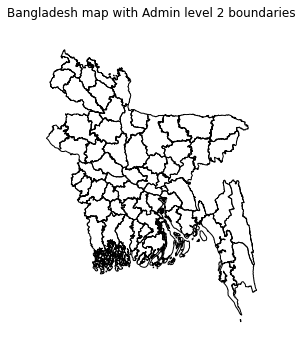

In [5]:
# Visualize what shape files look like..

gplt.polyplot(admin2_shp)
plt.title('Bangladesh map with Admin level 2 boundaries')
plt.show()

In [6]:
# Note: Both the datasets have granularity of ADMIN level 2
# Reading file having data for covid cases

# Quarantine data
covid_quaran = pd.read_excel(base_path + 'covid-19_district-wise-quarantine_bangladesh_24.03.2020.xls')

# Number of covid cases at subnational level
covid_cases = pd.read_excel(base_path + 'bgd-covid19-subnational.xlsx')

In [7]:
covid_quaran.head()

,Distname,Division,Geometry,Shape Area,Shape Leng,district_name,Dist_code,total_quarantine
0,Bagerhat,Khulna,Polygon,3.948888e+09,451037.389860,Bagerhat,4001,625
1,Bandarban,Chittagong,Polygon,4.595411e+09,582112.211609,Bandarban,2003,5
2,Barguna,Barisal,Polygon,1.517761e+09,320744.043819,Barguna,1004,110
3,Barisal,Barisal,Polygon,2.489743e+09,398321.467948,Barisal,1006,43
4,Bhola,Barisal,MultiPolygon,3.175528e+09,361181.817171,Bhola,1009,65


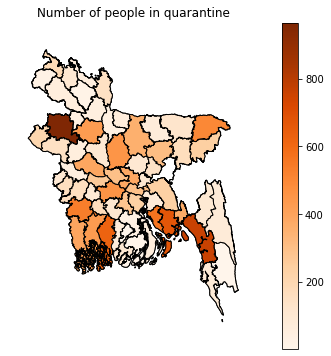

In [8]:
# Visualizing the number of people quarantined in different regions

merged_data = admin2_shp.set_index('ADM2_EN').join(covid_quaran.set_index('Distname'))

ax = gplt.polyplot(merged_data)

gplt.choropleth(
    merged_data,
    hue='total_quarantine',
    edgecolor='black',
    linewidth=1,
    cmap='Oranges',
    legend=True,
    ax=ax
)

file_name = f'plots/distric_wise_quarantine_for_covid_19/covid_quarantine.png'
plt.title('Number of people in quarantine')
plt.savefig(file_name)
plt.show()

In [9]:
covid_cases.head()

,Division,District/City,Total Cases in District,Updated Date,2020-07-07 00:00:00,2020-07-08 00:00:00,2020-07-09 00:00:00,2020-07-10 00:00:00,2020-07-11 00:00:00,2020-07-12 00:00:00,...,2020-12-07 00:00:00,2020-12-08 00:00:00,2021-12-09 00:00:00,2020-12-10 00:00:00,2020-12-11 00:00:00,2020-12-12 00:00:00,2020-12-13 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00,Unnamed: 166
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dhaka,Dhaka City,150629.0,15.12.2020,NaN,NaN,NaN,NaN,NaN,NaN,...,807.0,842.0,799.0,720.0,662.0,463.0,573.0,461.0,735.0,NaN
2,Dhaka,Dhaka (District),6179.0,15.12.2020,3379.0,6.0,23.0,98.0,9.0,23.0,...,12.0,10.0,10.0,18.0,14.0,0.0,10.0,12.0,1.0,NaN
3,Dhaka,Gazipur,6694.0,15.12.2020,3713.0,69.0,13.0,34.0,19.0,16.0,...,31.0,27.0,27.0,26.0,11.0,12.0,15.0,25.0,17.0,NaN
4,Dhaka,Kishoreganj,3341.0,15.12.2020,1663.0,14.0,10.0,21.0,19.0,12.0,...,7.0,6.0,4.0,2.0,8.0,5.0,9.0,8.0,1.0,NaN


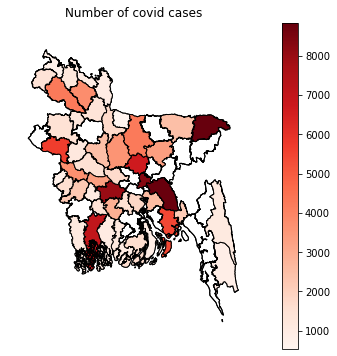

In [10]:
# Visualizing the number of covid cases at subnational level

merged_data = admin2_shp.set_index('ADM2_EN').join(covid_cases.set_index('District/City'))

ax = gplt.polyplot(merged_data)

gplt.choropleth(
    merged_data,
    hue='Total Cases in District',
    edgecolor='black',
    linewidth=1,
    cmap='Reds',
    legend=True,
    ax=ax
)

file_name = f'plots/distric_wise_quarantine_for_covid_19/covid_cases.png'
plt.title('Number of covid cases')
plt.savefig(file_name)
plt.show()